# Wandb export - results visualization for methods on batch = 32

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from src.settings import WANDB_EXPORT_DIR, FIGURE_DIR

In [30]:
PROJECT_NAME = 'neurosymbolics'

filename = f'wandb_results_{PROJECT_NAME}.csv'
filepath = WANDB_EXPORT_DIR.joinpath(filename)
df_results = pd.read_csv(filepath).query('state == "finished"')

df_results

,Unnamed: 0,seed,repeat,data_lang,data_name,model/name,data_source,model/class,model/gamma,trainer/gpus,...,datamodule/dataset/class,datamodule/processor/name,datamodule/processor/class,datamodule/processor/max_token_len,test/cm/61,test/cm/55,test/cm/56,test/cm/46,test/cm/64,val/time
2,2,2050,0,en,goemotions,bert-base-cased,amuseWSD,src.models.kepler.KeplerModel:Smart,1.0,[0],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2054,4,en,goemotions,bert-base-cased,amuseWSD,src.models.kepler.KeplerModel:Smart,1.0,[0],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2053,3,en,goemotions,bert-base-cased,amuseWSD,src.models.kepler.KeplerModel:Smart,1.0,[0],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,2052,2,en,goemotions,bert-base-cased,amuseWSD,src.models.kepler.KeplerModel:Smart,1.0,[0],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,2050,0,en,imdb,bert-base-cased,amuseWSD,src.models.kepler.KeplerModel:Smart,1.0,[0],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,919,2050,0,en,NaN,bert-base-cased,original,src.models.baseline.BaselineModel:Smart,NaN,[0],...,MovieReviewsBaselineDataset,bert-base-cased,TransformerProcessor,512.0,NaN,NaN,NaN,NaN,NaN,NaN
920,920,2052,2,en,NaN,bert-base-cased,original,src.models.baseline.BaselineModel:Smart,NaN,[0],...,GoEmotionsBaselineDataset,bert-base-cased,TransformerProcessor,512.0,NaN,NaN,NaN,NaN,NaN,NaN
921,921,2050,0,en,NaN,bert-base-cased,original,src.models.baseline.BaselineModel:Smart,NaN,[0],...,IMDBBaselineDataset,bert-base-cased,TransformerProcessor,512.0,NaN,NaN,NaN,NaN,NaN,NaN
922,922,2051,1,en,NaN,bert-base-cased,original,src.models.baseline.BaselineModel:Smart,NaN,[0],...,GoEmotionsBaselineDataset,bert-base-cased,TransformerProcessor,512.0,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921 entries, 2 to 923
Columns: 244 entries, Unnamed: 0 to val/time
dtypes: bool(2), float64(117), int64(16), object(109)
memory usage: 1.7+ MB


In [32]:
MODEL_CLASS_MAPPER = {
    'src.models.hurtbert_embedding.HurtbertEmbeddingModel:Smart': 'HurtBert-Emb',
    'src.models.hurtbert_encoding.HurtbertEncodingModel:Smart': 'HurtBert-Enc',
    'src.models.baseline.BaselineModel:Smart': 'Baseline',
    'src.models.hurtbert.HurtbertEncodingModel:Smart': 'HurtBert-Enc',
    'src.models.kepler.KeplerModel:Smart': 'Kepler',
}

DATASETS = [
    'imdb',
    'movie_reviews',
    'klej_ar',
    'polemo2',
    'stanford_treebank',
    'goemotions',
]

datasets_list = []
model_list = []

for idx, row in df_results.iterrows():
    experiment_name = row['name']
    for dataset in DATASETS:
        if dataset in experiment_name:
            datasets_list.append(dataset)
            break

    model_class_name = row['model/class']
    model_name = MODEL_CLASS_MAPPER[model_class_name]
    model_list.append(model_name)

df_results['dataset'] = datasets_list
df_results['model'] = model_list

In [33]:
df_results

,Unnamed: 0,seed,repeat,data_lang,data_name,model/name,data_source,model/class,model/gamma,trainer/gpus,...,datamodule/processor/class,datamodule/processor/max_token_len,test/cm/61,test/cm/55,test/cm/56,test/cm/46,test/cm/64,val/time,dataset,model
2,2,2050,0,en,goemotions,bert-base-cased,amuseWSD,src.models.kepler.KeplerModel:Smart,1.0,[0],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,goemotions,Kepler
3,3,2054,4,en,goemotions,bert-base-cased,amuseWSD,src.models.kepler.KeplerModel:Smart,1.0,[0],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,goemotions,Kepler
4,4,2053,3,en,goemotions,bert-base-cased,amuseWSD,src.models.kepler.KeplerModel:Smart,1.0,[0],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,goemotions,Kepler
5,5,2052,2,en,goemotions,bert-base-cased,amuseWSD,src.models.kepler.KeplerModel:Smart,1.0,[0],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,goemotions,Kepler
6,6,2050,0,en,imdb,bert-base-cased,amuseWSD,src.models.kepler.KeplerModel:Smart,1.0,[0],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,imdb,Kepler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,919,2050,0,en,NaN,bert-base-cased,original,src.models.baseline.BaselineModel:Smart,NaN,[0],...,TransformerProcessor,512.0,NaN,NaN,NaN,NaN,NaN,NaN,movie_reviews,Baseline
920,920,2052,2,en,NaN,bert-base-cased,original,src.models.baseline.BaselineModel:Smart,NaN,[0],...,TransformerProcessor,512.0,NaN,NaN,NaN,NaN,NaN,NaN,goemotions,Baseline
921,921,2050,0,en,NaN,bert-base-cased,original,src.models.baseline.BaselineModel:Smart,NaN,[0],...,TransformerProcessor,512.0,NaN,NaN,NaN,NaN,NaN,NaN,imdb,Baseline
922,922,2051,1,en,NaN,bert-base-cased,original,src.models.baseline.BaselineModel:Smart,NaN,[0],...,TransformerProcessor,512.0,NaN,NaN,NaN,NaN,NaN,NaN,goemotions,Baseline


In [34]:
SELECT_COLS = [
    'dataset',
    'model',
    'repeat',
    'epoch',
    'datamodule/train_size',
    'test/f1_micro',
    'test/f1_macro',
    'test/accuracy',
]

df_results = df_results[SELECT_COLS].copy(deep=True)
df_results = df_results.replace('None', np.nan)
df_results = df_results.rename(columns={'datamodule/train_size': 'train_size'})

df_results

,dataset,model,repeat,epoch,train_size,test/f1_micro,test/f1_macro,test/accuracy
2,goemotions,Kepler,0,79,10000,0.511034,0.302052,0.965222
3,goemotions,Kepler,4,79,6000,0.406865,0.126168,0.962970
4,goemotions,Kepler,3,78,6000,0.448719,0.174526,0.964601
5,goemotions,Kepler,2,0,6000,0.000000,0.000000,0.956889
6,imdb,Kepler,0,26,0,0.931880,0.931876,0.931880
...,...,...,...,...,...,...,...,...
919,movie_reviews,Baseline,0,9,250,0.808571,0.808187,0.808571
920,goemotions,Baseline,2,3,250,0.200234,0.014053,0.953333
921,imdb,Baseline,0,12,250,0.871640,0.871628,0.871640
922,goemotions,Baseline,1,4,250,0.156072,0.011854,0.954610


## GoEmotions

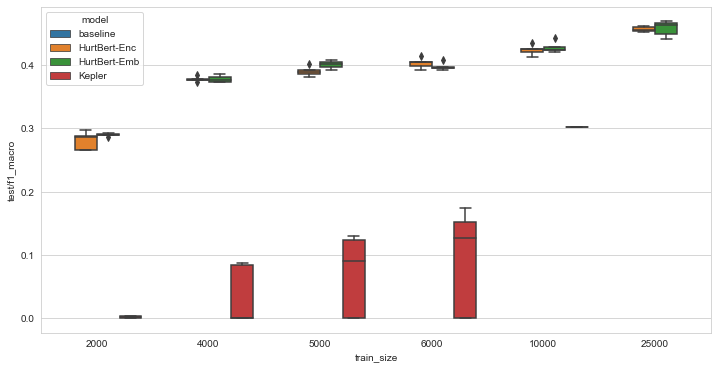

In [35]:
df_goemo_results = df_results[df_results['dataset'] == 'goemotions']
df_goemo_results = df_goemo_results[df_goemo_results['train_size'] > 1000.0]
df_goemo_results['train_size'] = df_goemo_results['train_size'].apply(lambda x: 43410 if x == 0 else x)

plt.figure(figsize=(12, 6))
ax = sns.boxplot(
    x="train_size",
    y="test/f1_macro",
    hue="model",
    data=df_goemo_results,
    hue_order=[
        'baseline',
        'HurtBert-Enc',
        'HurtBert-Emb',
        'Kepler',
    ],
)

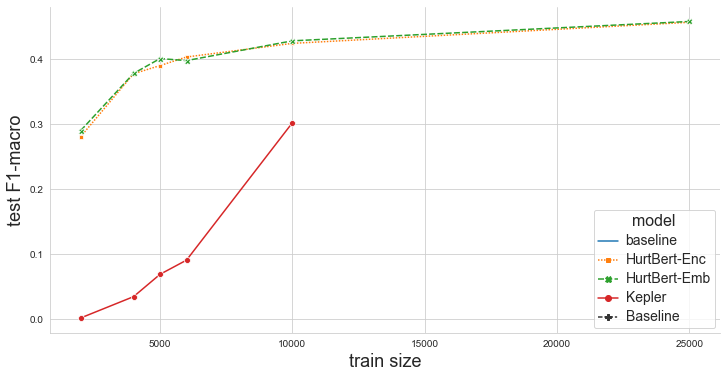

In [36]:
plt.figure(figsize=(12, 6))

sns.set_style("whitegrid")
ax = sns.lineplot(
    data=df_goemo_results,
    x="train_size",
    y="test/f1_macro",
    hue="model",
    style="model",
    hue_order=[
        'baseline',
        'HurtBert-Enc',
        'HurtBert-Emb',
        'Kepler',
    ],
    markers=True,
    dashes=True,
    ci=None,
)
ax.set_xlabel("train size", fontsize=18)
ax.set_ylabel("test F1-macro", fontsize=18)
plt.setp(ax.get_legend().get_texts(), fontsize='14')  # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16')  # for legend title

sns.despine()

In [37]:
df_goemo_results.groupby(by=['train_size', 'model']).agg({
    'test/f1_macro': ['mean', 'std'],
    'test/f1_micro': ['mean', 'std']
}).reset_index()

train_size         model test/f1_macro           test/f1_micro          
                                     mean       std          mean       std
0        2000      Baseline      0.316033  0.008500      0.498388  0.005772
1        2000  HurtBert-Emb      0.289933  0.002611      0.480242  0.022095
2        2000  HurtBert-Enc      0.280642  0.014495      0.469696  0.009196
3        2000        Kepler      0.001264  0.001441      0.009113  0.012554
4        4000      Baseline      0.392041  0.015125      0.534529  0.014646
5        4000  HurtBert-Emb      0.378077  0.005478      0.514648  0.011557
6        4000  HurtBert-Enc      0.377622  0.004102      0.504168  0.009957
7        4000        Kepler      0.034144  0.046767      0.143164  0.196364
8        5000      Baseline      0.404595  0.008572      0.536091  0.012341
9        5000  HurtBert-Emb      0.400971  0.006305      0.526279  0.010338
10       5000  HurtBert-Enc      0.390187  0.007914      0.513525  0.010378
11       5000        Kepler      0.068539  0.064291      0.241040  0.220932
12       6000      Baseline      0.412797  0.009976      0.534308  0.004580
13       6000  HurtBert-Emb      0.397848  0.005922      0.533497  0.009696
14       6000  HurtBert-Enc      0.403380  0.008363      0.523611  0.010271
15       6000        Kepler      0.090375  0.084255      0.258328  0.236308
16      10000      Baseline      0.443347  0.005283      0.549093  0.006429
17      10000  HurtBert-Emb      0.428314  0.009193      0.544692  0.006095
18      10000  HurtBert-Enc      0.424399  0.008166      0.540245  0.003369
19      10000        Kepler      0.302052       NaN      0.511034       NaN
20      25000      Baseline      0.453694  0.008508      0.567954  0.009969
21      25000  HurtBert-Emb      0.458142  0.011814      0.562260  0.008900
22      25000  HurtBert-Enc      0.456883  0.004114      0.556234  0.013252

## IMDB

/tmp/ipykernel_7431/3504396209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imdb_results['train_size'] = df_imdb_results['train_size'].apply(lambda x: 22500 if x == 0 else x)


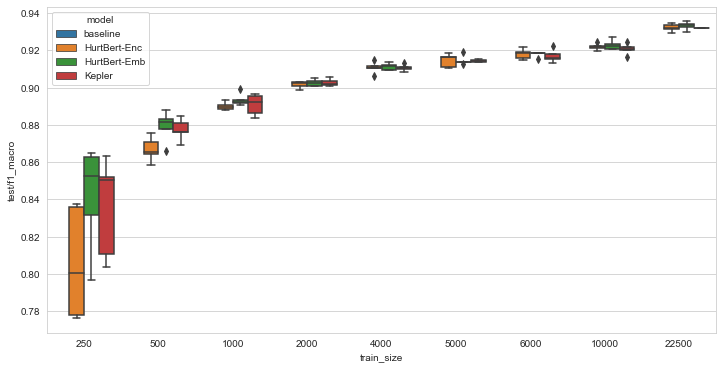

In [38]:
df_imdb_results = df_results[df_results['dataset'] == 'imdb']
df_imdb_results['train_size'] = df_imdb_results['train_size'].apply(lambda x: 22500 if x == 0 else x)

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x="train_size", y="test/f1_macro", hue="model", data=df_imdb_results,
                 hue_order=['baseline', 'HurtBert-Enc', 'HurtBert-Emb', 'Kepler'])

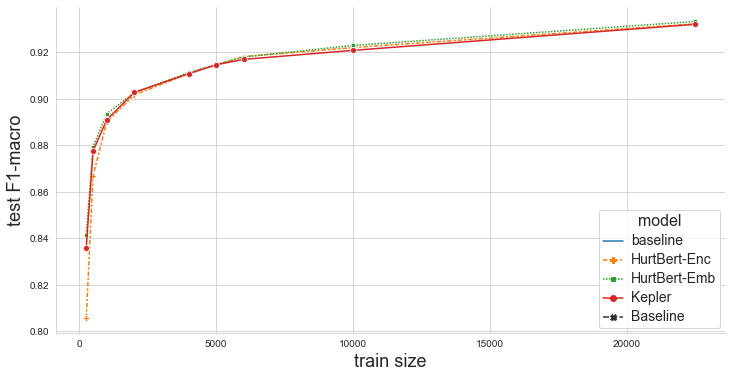

In [39]:
plt.figure(figsize=(12, 6))

sns.set_style("whitegrid")
ax = sns.lineplot(
    data=df_imdb_results,
    x="train_size",
    y="test/f1_macro",
    hue="model",
    style="model",
    hue_order=[
        'baseline',
        'HurtBert-Enc',
        'HurtBert-Emb',
        'Kepler',
    ],
    markers=True,
    dashes=True,
    ci=None,
)
ax.set_xlabel("train size", fontsize=18)
ax.set_ylabel("test F1-macro", fontsize=18)
plt.setp(ax.get_legend().get_texts(), fontsize='14')  # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16')  # for legend title

sns.despine()

In [40]:
df_imdb_results.groupby(by=['train_size', 'model']).agg({
    'test/f1_macro': ['mean', 'std'],
    'test/f1_micro': ['mean', 'std']
}).reset_index()

train_size         model test/f1_macro           test/f1_micro          
                                     mean       std          mean       std
0         250      Baseline      0.859157  0.013482      0.859208  0.013482
1         250  HurtBert-Emb      0.841574  0.028177      0.841704  0.028173
2         250  HurtBert-Enc      0.805718  0.030014      0.806216  0.029875
3         250        Kepler      0.835985  0.026864      0.836072  0.026893
4         500      Baseline      0.881612  0.002261      0.881632  0.002285
5         500  HurtBert-Emb      0.879338  0.008265      0.879344  0.008263
6         500  HurtBert-Enc      0.866864  0.006481      0.866968  0.006498
7         500        Kepler      0.877521  0.005842      0.877552  0.005825
8        1000      Baseline      0.892167  0.003294      0.892240  0.003277
9        1000  HurtBert-Emb      0.893477  0.003217      0.893512  0.003196
10       1000  HurtBert-Enc      0.889939  0.002159      0.889952  0.002156
11       1000        Kepler      0.890897  0.005580      0.890920  0.005567
12       2000      Baseline      0.903742  0.003989      0.903744  0.003989
13       2000  HurtBert-Emb      0.902465  0.001937      0.902504  0.001915
14       2000  HurtBert-Enc      0.901515  0.001830      0.901520  0.001832
15       2000        Kepler      0.902617  0.001995      0.902632  0.001993
16       4000      Baseline      0.912871  0.002054      0.912872  0.002054
17       4000  HurtBert-Emb      0.911220  0.001735      0.911248  0.001730
18       4000  HurtBert-Enc      0.910740  0.003048      0.910752  0.003035
19       4000        Kepler      0.910666  0.001627      0.910672  0.001628
20       5000      Baseline      0.915362  0.002630      0.915368  0.002626
21       5000  HurtBert-Emb      0.914548  0.002571      0.914560  0.002570
22       5000  HurtBert-Enc      0.914503  0.003532      0.914512  0.003526
23       5000        Kepler      0.914503  0.000604      0.914504  0.000604
24       6000      Baseline      0.917590  0.002168      0.917600  0.002172
25       6000  HurtBert-Emb      0.917842  0.001270      0.917848  0.001259
26       6000  HurtBert-Enc      0.918003  0.002705      0.918008  0.002706
27       6000        Kepler      0.916814  0.003417      0.916824  0.003409
28      10000      Baseline      0.922916  0.002165      0.922920  0.002164
29      10000  HurtBert-Emb      0.922814  0.002669      0.922824  0.002669
30      10000  HurtBert-Enc      0.921895  0.001691      0.921904  0.001684
31      10000        Kepler      0.920689  0.002927      0.920704  0.002918
32      22500      Baseline      0.932950  0.001335      0.932952  0.001333
33      22500  HurtBert-Emb      0.933108  0.002051      0.933112  0.002049
34      22500  HurtBert-Enc      0.932093  0.002142      0.932096  0.002144
35      22500        Kepler      0.931876       NaN      0.931880       NaN

## Movie Reviews

/tmp/ipykernel_7431/2081416153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie_results['train_size'] = df_movie_results['train_size'].apply(lambda x: 8534 if x == 0 else x)


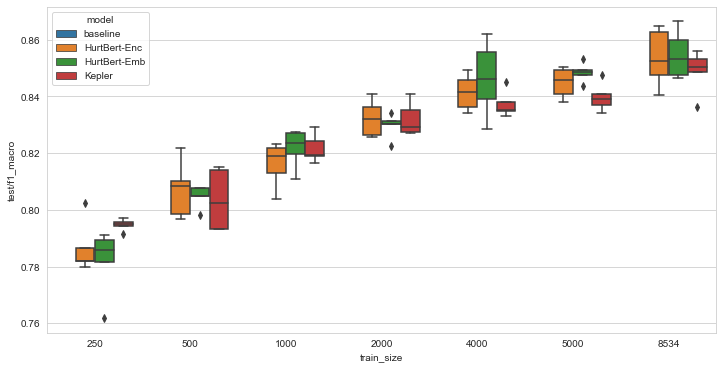

In [41]:
df_movie_results = df_results[df_results['dataset'] == 'movie_reviews']
df_movie_results['train_size'] = df_movie_results['train_size'].apply(lambda x: 8534 if x == 0 else x)

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x="train_size", y="test/f1_macro", hue="model", data=df_movie_results,
                 hue_order=['baseline', 'HurtBert-Enc', 'HurtBert-Emb', 'Kepler'])

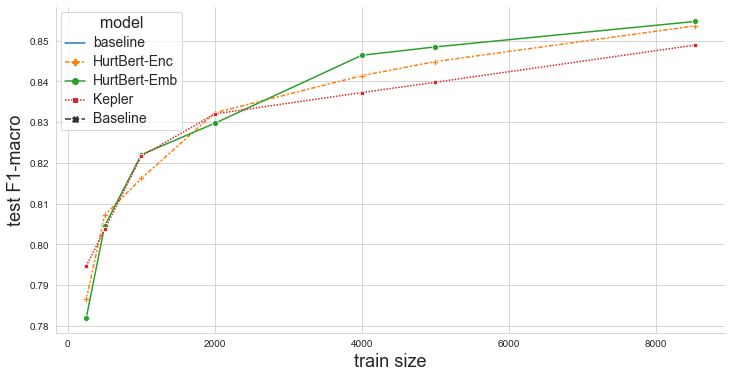

In [42]:
plt.figure(figsize=(12, 6))

sns.set_style("whitegrid")
ax = sns.lineplot(
    data=df_movie_results,
    x="train_size",
    y="test/f1_macro",
    hue="model",
    style="model",
    hue_order=[
        'baseline',
        'HurtBert-Enc',
        'HurtBert-Emb',
        'Kepler',
    ],
    markers=True,
    dashes=True,
    ci=None,
)
ax.set_xlabel("train size", fontsize=18)
ax.set_ylabel("test F1-macro", fontsize=18)
plt.setp(ax.get_legend().get_texts(), fontsize='14')  # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16')  # for legend title

sns.despine()

In [43]:
df_movie_results.groupby(by=['train_size', 'model']).agg({
    'test/f1_macro': ['mean', 'std'],
    'test/f1_micro': ['mean', 'std']
}).reset_index()

train_size         model test/f1_macro           test/f1_micro          
                                     mean       std          mean       std
0         250      Baseline      0.797423  0.011568      0.797905  0.011337
1         250  HurtBert-Emb      0.781971  0.011804      0.782095  0.011865
2         250  HurtBert-Enc      0.786564  0.009276      0.786667  0.009380
3         250        Kepler      0.794721  0.002124      0.794857  0.002193
4         500      Baseline      0.804715  0.011193      0.804952  0.011155
5         500  HurtBert-Emb      0.804527  0.003890      0.804571  0.003892
6         500  HurtBert-Enc      0.807183  0.010052      0.807429  0.009952
7         500        Kepler      0.803691  0.010676      0.803810  0.010733
8        1000      Baseline      0.820308  0.007086      0.820476  0.007146
9        1000  HurtBert-Emb      0.822055  0.006444      0.822222  0.006279
10       1000  HurtBert-Enc      0.816210  0.008008      0.816381  0.008064
11       1000        Kepler      0.821695  0.005044      0.822095  0.005012
12       2000      Baseline      0.834433  0.006098      0.834476  0.006076
13       2000  HurtBert-Emb      0.829744  0.004351      0.829905  0.004238
14       2000  HurtBert-Enc      0.832314  0.006393      0.832571  0.006187
15       2000        Kepler      0.832041  0.005913      0.832190  0.005809
16       4000      Baseline      0.841650  0.006635      0.841746  0.006582
17       4000  HurtBert-Emb      0.846423  0.012644      0.846508  0.012684
18       4000  HurtBert-Enc      0.841428  0.006376      0.841524  0.006375
19       4000        Kepler      0.837280  0.004740      0.837524  0.004884
20       5000      Baseline      0.843573  0.005610      0.843619  0.005570
21       5000  HurtBert-Emb      0.848478  0.003394      0.848571  0.003434
22       5000  HurtBert-Enc      0.844878  0.005374      0.844952  0.005362
23       5000        Kepler      0.839805  0.005011      0.840000  0.005084
24       8534      Baseline      0.849978  0.005877      0.850095  0.005738
25       8534  HurtBert-Emb      0.854720  0.008447      0.854857  0.008481
26       8534  HurtBert-Enc      0.853637  0.010173      0.853714  0.010093
27       8534        Kepler      0.848927  0.007692      0.848952  0.007696

## Stanford treebank

/tmp/ipykernel_7431/1283990216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_treebank_results['train_size'] = df_treebank_results['train_size'].apply(lambda x: 8544 if x == 0 else x)


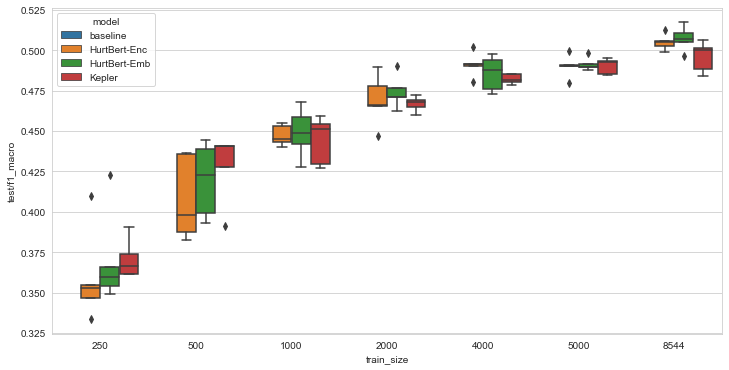

In [44]:
df_treebank_results = df_results[df_results['dataset'] == 'stanford_treebank']
df_treebank_results['train_size'] = df_treebank_results['train_size'].apply(lambda x: 8544 if x == 0 else x)

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x="train_size", y="test/f1_macro", hue="model", data=df_treebank_results,
                 hue_order=['baseline', 'HurtBert-Enc', 'HurtBert-Emb', 'Kepler'])

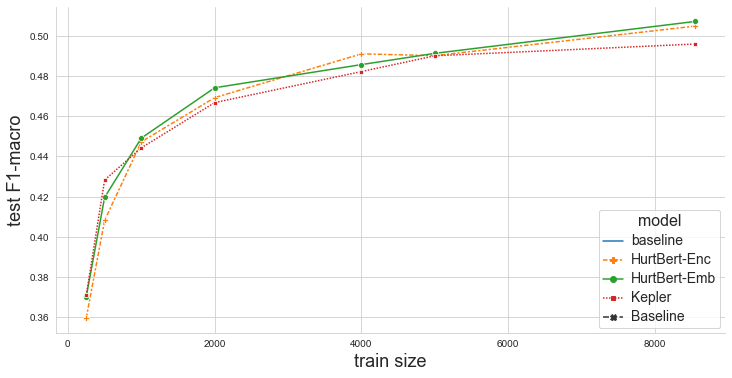

In [45]:
plt.figure(figsize=(12, 6))

sns.set_style("whitegrid")
ax = sns.lineplot(
    data=df_treebank_results,
    x="train_size",
    y="test/f1_macro",
    hue="model",
    style="model",
    hue_order=[
        'baseline',
        'HurtBert-Enc',
        'HurtBert-Emb',
        'Kepler',
    ],
    markers=True,
    dashes=True,
    ci=None,
)
ax.set_xlabel("train size", fontsize=18)
ax.set_ylabel("test F1-macro", fontsize=18)
plt.setp(ax.get_legend().get_texts(), fontsize='14')  # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16')  # for legend title

sns.despine()

In [46]:
df_treebank_results.groupby(by=['train_size', 'model']).agg({
    'test/f1_macro': ['mean', 'std'],
    'test/f1_micro': ['mean', 'std']
}).reset_index()

train_size         model test/f1_macro           test/f1_micro          
                                     mean       std          mean       std
0         250      Baseline      0.361574  0.015347      0.394932  0.020635
1         250  HurtBert-Emb      0.370105  0.029995      0.416561  0.037426
2         250  HurtBert-Enc      0.359492  0.029137      0.408688  0.034785
3         250        Kepler      0.370915  0.012154      0.393575  0.017810
4         500      Baseline      0.414338  0.017014      0.436018  0.007216
5         500  HurtBert-Emb      0.419535  0.023083      0.442896  0.031260
6         500  HurtBert-Enc      0.408100  0.026415      0.438914  0.025337
7         500        Kepler      0.428245  0.021373      0.442896  0.024042
8        1000      Baseline      0.442403  0.016123      0.461614  0.007703
9        1000  HurtBert-Emb      0.449116  0.014484      0.459729  0.015493
10       1000  HurtBert-Enc      0.447244  0.006269      0.460181  0.008214
11       1000        Kepler      0.444278  0.014808      0.458552  0.013233
12       2000      Baseline      0.466323  0.006408      0.481538  0.012696
13       2000  HurtBert-Emb      0.474202  0.010324      0.486335  0.012915
14       2000  HurtBert-Enc      0.469276  0.015932      0.481900  0.010770
15       2000        Kepler      0.466809  0.004721      0.475475  0.004250
16       4000      Baseline      0.485126  0.003805      0.498824  0.005321
17       4000  HurtBert-Emb      0.485747  0.010891      0.496742  0.011182
18       4000  HurtBert-Enc      0.491096  0.007562      0.499367  0.005965
19       4000        Kepler      0.482276  0.003110      0.488959  0.006538
20       5000      Baseline      0.484518  0.005278      0.497195  0.008736
21       5000  HurtBert-Emb      0.491356  0.004074      0.499005  0.004899
22       5000  HurtBert-Enc      0.490192  0.007126      0.501810  0.012179
23       5000        Kepler      0.490129  0.004756      0.499186  0.008407
24       8544      Baseline      0.504517  0.003268      0.514932  0.004821
25       8544  HurtBert-Emb      0.507232  0.007559      0.521176  0.010191
26       8544  HurtBert-Enc      0.504917  0.004946      0.513394  0.009332
27       8544        Kepler      0.495993  0.009268      0.507964  0.007696

## Polemo2.0

/tmp/ipykernel_7431/1523222904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_polemo_results['train_size'] = df_polemo_results['train_size'].apply(lambda x: 6573 if x == 0 else x)


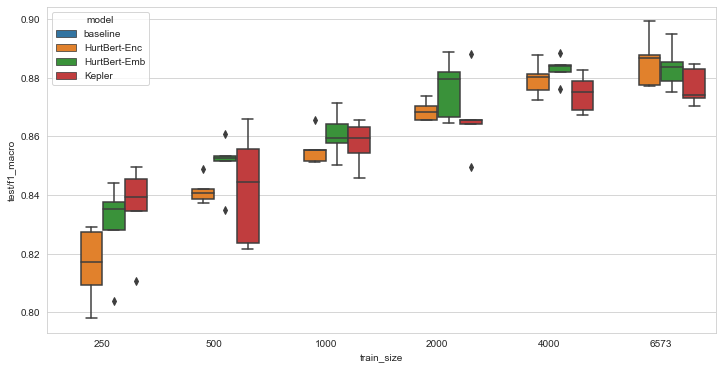

In [47]:
df_polemo_results = df_results[df_results['dataset'] == 'polemo2']
df_polemo_results['train_size'] = df_polemo_results['train_size'].apply(lambda x: 6573 if x == 0 else x)

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x="train_size", y="test/f1_macro", hue="model", data=df_polemo_results,
                 hue_order=['baseline', 'HurtBert-Enc', 'HurtBert-Emb', 'Kepler'])

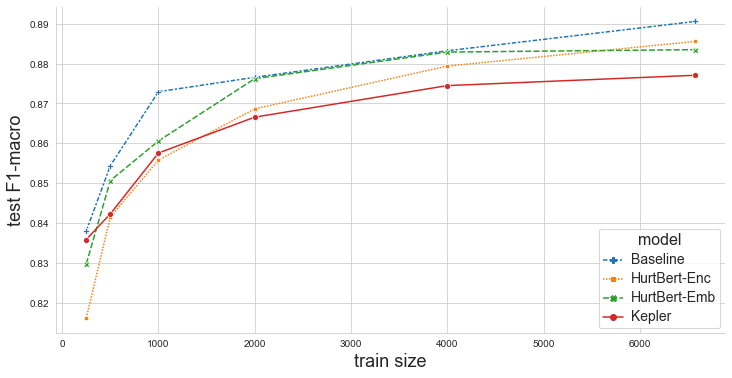

In [63]:
plt.figure(figsize=(12, 6))

sns.set_style("whitegrid")
ax = sns.lineplot(
    data=df_polemo_results,
    x="train_size",
    y="test/f1_macro",
    hue="model",
    style="model",
    hue_order=[
        'Baseline',
        'HurtBert-Enc',
        'HurtBert-Emb',
        'Kepler',
    ],
    markers=True,
    dashes=True,
    ci=None,
)
ax.set_xlabel("train size", fontsize=18)
ax.set_ylabel("test F1-macro", fontsize=18)
plt.setp(ax.get_legend().get_texts(), fontsize='14')  # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16')  # for legend title

sns.despine()

In [49]:
df_polemo_results.groupby(by=['train_size', 'model']).agg({
    'test/f1_macro': ['mean', 'std'],
    'test/f1_micro': ['mean', 'std']
}).reset_index()

train_size         model test/f1_macro           test/f1_micro          
                                     mean       std          mean       std
0         250      Baseline      0.838012  0.006220      0.851463  0.003384
1         250  HurtBert-Emb      0.829719  0.015541      0.846585  0.009501
2         250  HurtBert-Enc      0.816189  0.012921      0.833171  0.008108
3         250        Kepler      0.835873  0.015209      0.851951  0.009391
4         500      Baseline      0.854393  0.008225      0.866585  0.006488
5         500  HurtBert-Emb      0.850665  0.009481      0.866585  0.007142
6         500  HurtBert-Enc      0.841546  0.004480      0.851707  0.005217
7         500        Kepler      0.842307  0.019466      0.859756  0.017902
8        1000      Baseline      0.872959  0.009360      0.882683  0.010108
9        1000  HurtBert-Emb      0.860602  0.007821      0.872195  0.008062
10       1000  HurtBert-Enc      0.855804  0.005697      0.869268  0.005131
11       1000        Kepler      0.857583  0.007866      0.872439  0.010617
12       2000      Baseline      0.876574  0.008090      0.889268  0.006301
13       2000  HurtBert-Emb      0.876228  0.010274      0.888049  0.008853
14       2000  HurtBert-Enc      0.868661  0.003513      0.877561  0.005759
15       2000        Kepler      0.866572  0.013776      0.878780  0.013459
16       4000      Baseline      0.883227  0.010262      0.892927  0.011421
17       4000  HurtBert-Emb      0.882901  0.004489      0.895366  0.003272
18       4000  HurtBert-Enc      0.879384  0.005825      0.891951  0.004612
19       4000        Kepler      0.874486  0.006427      0.885610  0.008015
20       6573      Baseline      0.890579  0.010925      0.902195  0.009733
21       6573  HurtBert-Emb      0.883510  0.007431      0.896829  0.005358
22       6573  HurtBert-Enc      0.885570  0.009047      0.896341  0.010839
23       6573        Kepler      0.877079  0.006395      0.891951  0.005495

## Allegro Reviews

/tmp/ipykernel_7431/2470818225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_klej_results['train_size'] = df_klej_results['train_size'].apply(lambda x: 9577 if x == 0 else x)


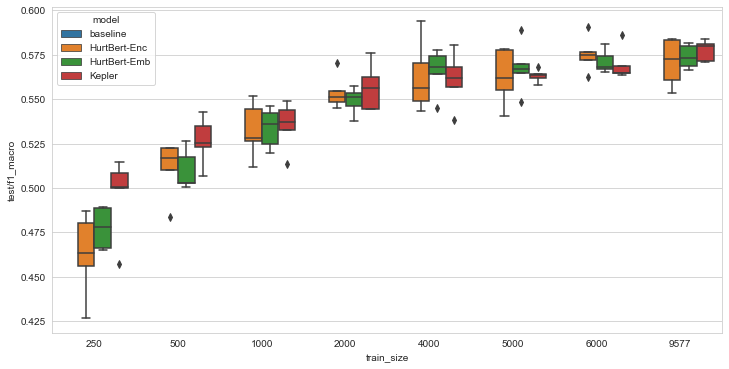

In [50]:
df_klej_results = df_results[df_results['dataset'] == 'klej_ar']
df_klej_results['train_size'] = df_klej_results['train_size'].apply(lambda x: 9577 if x == 0 else x)

plt.figure(figsize=(12, 6))
ax = sns.boxplot(
    x="train_size",
    y="test/f1_macro",
    hue="model",
    data=df_klej_results,
    hue_order=[
        'baseline',
        'HurtBert-Enc',
        'HurtBert-Emb',
        'Kepler',
    ],
)

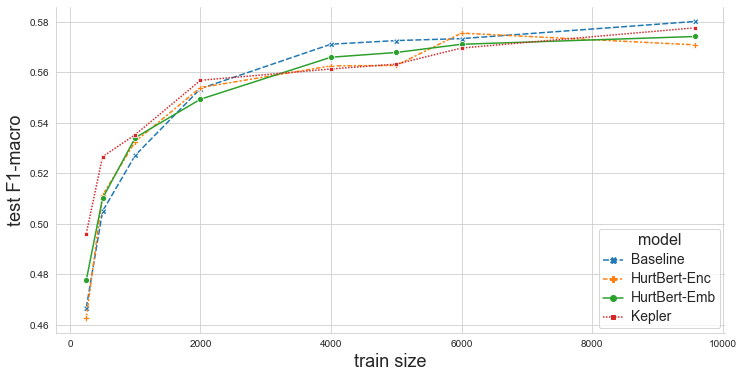

In [62]:
plt.figure(figsize=(12, 6))

sns.set_style("whitegrid")
ax = sns.lineplot(
    data=df_klej_results,
    x="train_size",
    y="test/f1_macro",
    hue="model",
    style="model",
    hue_order=[
        'Baseline',
        'HurtBert-Enc',
        'HurtBert-Emb',
        'Kepler',
    ],
    markers=True,
    dashes=True,
    ci=None,
)
ax.set_xlabel("train size", fontsize=18)
ax.set_ylabel("test F1-macro", fontsize=18)
plt.setp(ax.get_legend().get_texts(), fontsize='14')  # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16')  # for legend title

sns.despine()

In [52]:
df_klej_results.groupby(by=['train_size', 'model']).agg({
    'test/f1_macro': ['mean', 'std'],
    'test/f1_micro': ['mean', 'std']
}).reset_index()

train_size         model test/f1_macro           test/f1_micro          
                                     mean       std          mean       std
0         250      Baseline      0.466695  0.012942      0.559046  0.017928
1         250  HurtBert-Emb      0.477637  0.011607      0.567540  0.021181
2         250  HurtBert-Enc      0.462726  0.023698      0.546169  0.021425
3         250        Kepler      0.496121  0.022619      0.574798  0.011324
4         500      Baseline      0.504973  0.012793      0.588469  0.014302
5         500  HurtBert-Emb      0.510075  0.011418      0.576613  0.015305
6         500  HurtBert-Enc      0.511271  0.016140      0.585484  0.014563
7         500        Kepler      0.526521  0.013717      0.597177  0.013833
8        1000      Baseline      0.527064  0.008163      0.597581  0.010584
9        1000  HurtBert-Emb      0.534020  0.011157      0.599798  0.013419
10       1000  HurtBert-Enc      0.532518  0.015818      0.605040  0.011979
11       1000        Kepler      0.535227  0.013520      0.600000  0.017539
12       2000      Baseline      0.553460  0.010947      0.621471  0.009202
13       2000  HurtBert-Emb      0.549268  0.007563      0.616734  0.013305
14       2000  HurtBert-Enc      0.553866  0.009764      0.613306  0.008920
15       2000        Kepler      0.556752  0.013196      0.626411  0.012703
16       4000      Baseline      0.571031  0.010719      0.636978  0.016081
17       4000  HurtBert-Emb      0.565874  0.012712      0.634274  0.011743
18       4000  HurtBert-Enc      0.562451  0.020215      0.624395  0.015980
19       4000        Kepler      0.561228  0.015471      0.631452  0.017786
20       5000      Baseline      0.572467  0.012322      0.638767  0.007257
21       5000  HurtBert-Emb      0.567754  0.014528      0.631653  0.015788
22       5000  HurtBert-Enc      0.562627  0.015776      0.626411  0.022894
23       5000        Kepler      0.563153  0.003556      0.634677  0.011351
24       6000      Baseline      0.573243  0.017795      0.649503  0.012064
25       6000  HurtBert-Emb      0.571001  0.006580      0.628831  0.006510
26       6000  HurtBert-Enc      0.575417  0.010270      0.636492  0.009033
27       6000        Kepler      0.569508  0.009354      0.637702  0.007597
28       9577      Baseline      0.580022  0.002001      0.653877  0.006571
29       9577  HurtBert-Emb      0.574076  0.006607      0.644355  0.008536
30       9577  HurtBert-Enc      0.570759  0.013471      0.638105  0.013259
31       9577        Kepler      0.577510  0.005918      0.645363  0.006626

### All datasets - FacetGrid

In [67]:
df_all_results = pd.concat([
    df_imdb_results,
    df_movie_results,
    df_treebank_results,
    df_polemo_results,
    df_klej_results,
    df_goemo_results,
])
df_all_results.head()

,dataset,model,repeat,epoch,train_size,test/f1_micro,test/f1_macro,test/accuracy
6,imdb,Kepler,0,26,22500,0.93188,0.931876,0.93188
7,imdb,Kepler,4,1,10000,0.92016,0.920143,0.92016
18,imdb,Kepler,3,2,10000,0.92068,0.920658,0.92068
19,imdb,Kepler,2,3,10000,0.92184,0.921834,0.92184
20,imdb,Kepler,1,22,10000,0.92444,0.924437,0.92444


In [68]:
DATASET_NAME_MAP = {
    'polemo2': 'Polemo2.0',
    'klej_ar': 'Allegro Reviews',
    'goemotions': 'GoEmotions',
    'stanford_treebank': 'Stanford Treebank',
    'movie_reviews': 'Movie Reviews',
    'imdb': 'IMDB',
}

df_all_results['dataset'] = df_all_results['dataset'].apply(lambda x: DATASET_NAME_MAP[x])
df_all_results = df_all_results.rename(
    columns={
        'test/f1_micro': 'F1-micro',
        'test/f1_macro': 'F1-macro',
        'test/accuracy': 'accuracy',
        'train_size': 'train size',
    }
)
df_all_results.head()

,dataset,model,repeat,epoch,train size,F1-micro,F1-macro,accuracy
6,IMDB,Kepler,0,26,22500,0.93188,0.931876,0.93188
7,IMDB,Kepler,4,1,10000,0.92016,0.920143,0.92016
18,IMDB,Kepler,3,2,10000,0.92068,0.920658,0.92068
19,IMDB,Kepler,2,3,10000,0.92184,0.921834,0.92184
20,IMDB,Kepler,1,22,10000,0.92444,0.924437,0.92444


<Figure size 864x432 with 0 Axes>

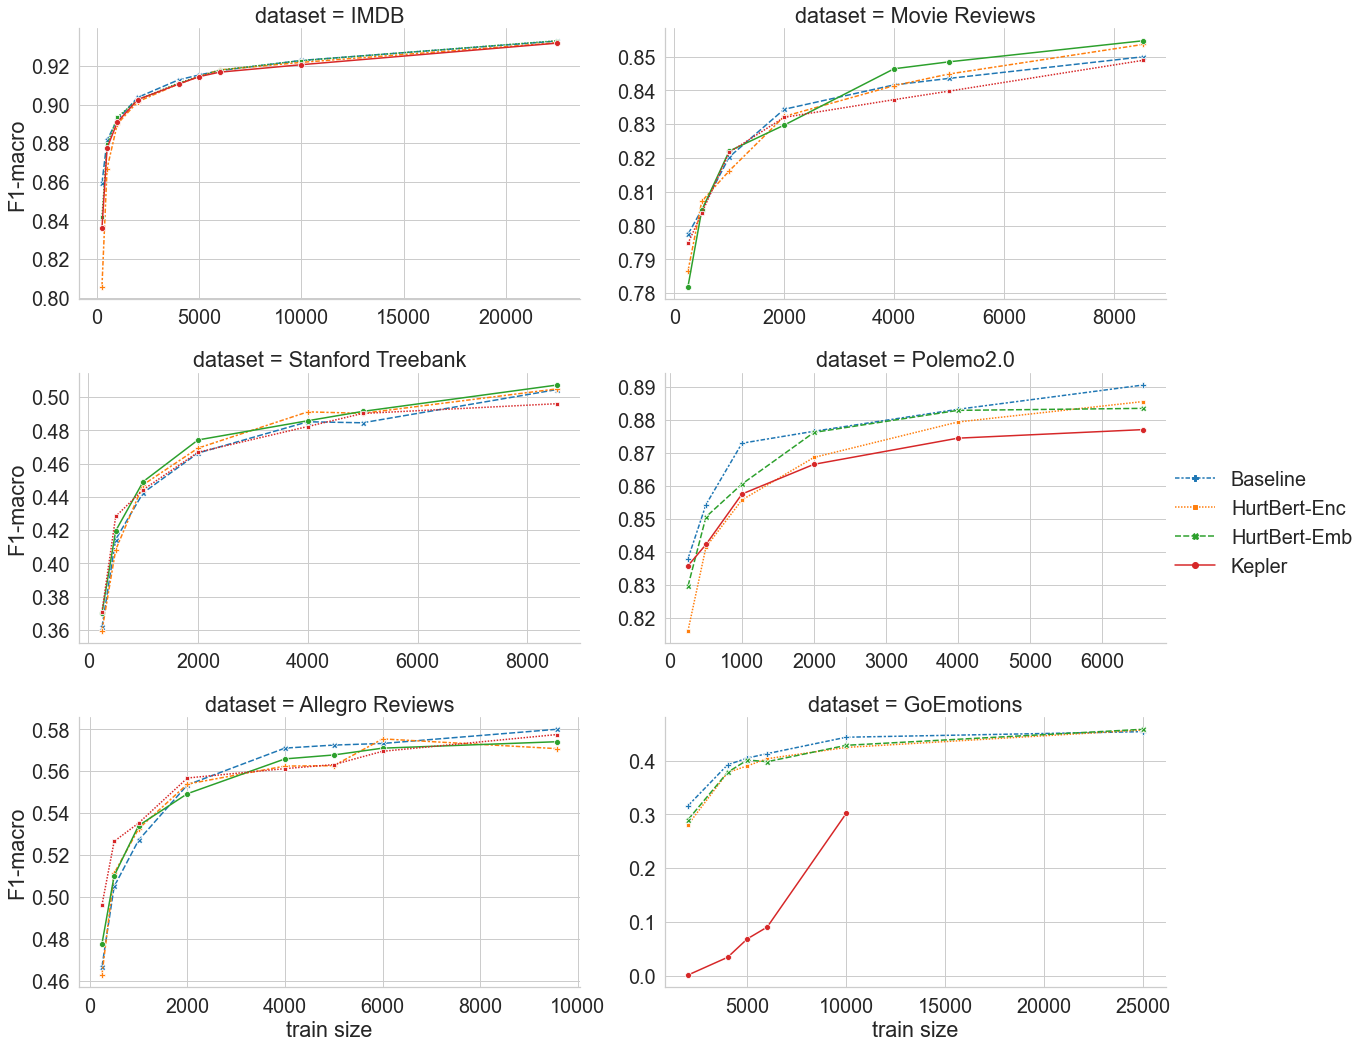

In [70]:
plt.figure(figsize=(12, 6))
with sns.plotting_context("notebook", font_scale=1.8):
    g = sns.FacetGrid(
        df_all_results,
        col="dataset",
        col_wrap=2,
        sharey=False,
        sharex=False,
        height=5,
        aspect=1.7,
        legend_out=True,

    )
    g.map_dataframe(
        sns.lineplot,
        x="train size",
        y="F1-macro",
        style="model",
        hue="model",
        markers=True,
        dashes=True,
        ci=None,
        hue_order=[
            'Baseline',
            'HurtBert-Enc',
            'HurtBert-Emb',
            'Kepler',
        ],
    )
    g.add_legend()

sns.despine()
g.savefig(FIGURE_DIR.joinpath('finetune_exp_results.png'), dpi=300)